In [1]:
import path_imports

from src.read_corpus import read_corpus

import pandas as pd
import matplotlib.pyplot as plt

### Read the files and store it into a dataframe 

In [2]:
df = read_corpus()

100%|██████████| 29/29 [00:04<00:00,  7.14it/s]


### Pre-processing

In [3]:
# rename
df.replace("Donald J. Trump", "Donald Trump", inplace=True)
df.replace("Joseph R. Biden", "Joe Biden", inplace=True)
# count the number of words of eache text
df["nb_words"] = df["text"].str.len()

## Utils

In [6]:
def plot_double_bar(df : pd.DataFrame, title : str = None) -> None:
    _, axs = plt.subplots(1, 2, figsize=(15, 5))
    df.plot(kind="bar", ax=axs[0], title=title)
    if title:
        title += " log scale"
    df.plot(kind="bar", ax=axs[1], logy=True, title=title)

## Stats on category

### Display the number of sample in each category

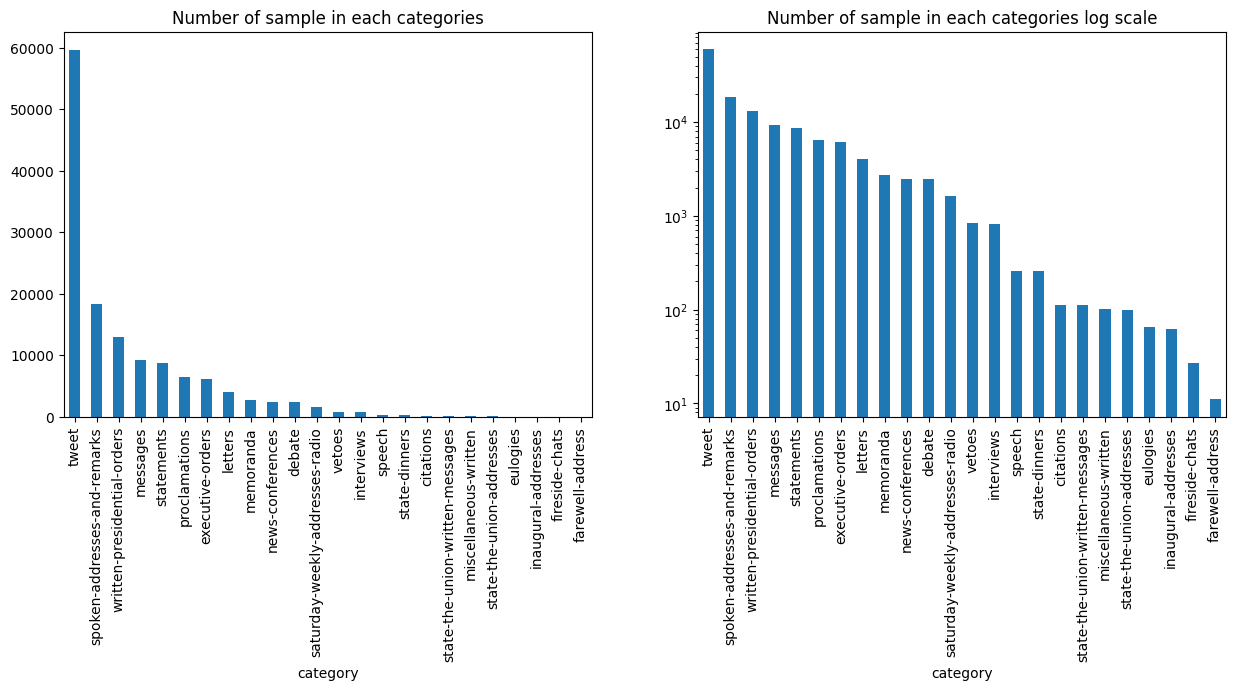

In [8]:
plot_double_bar(df["category"].value_counts(), title="Number of sample in each categories")

### Display the number of words in each category

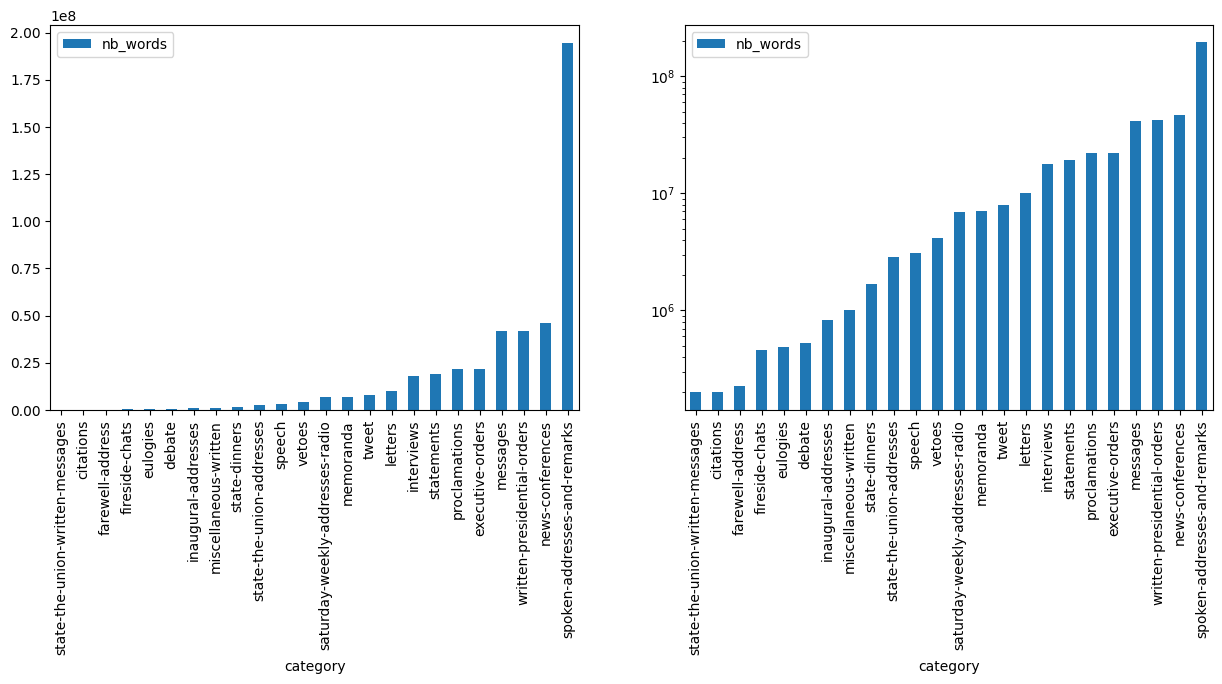

In [6]:
df2 = (
    df.groupby(df["category"]).aggregate({"nb_words": "sum"}).sort_values(by="nb_words")
)

plot_double_bar(df2)

### Average, std of words per sample for each category

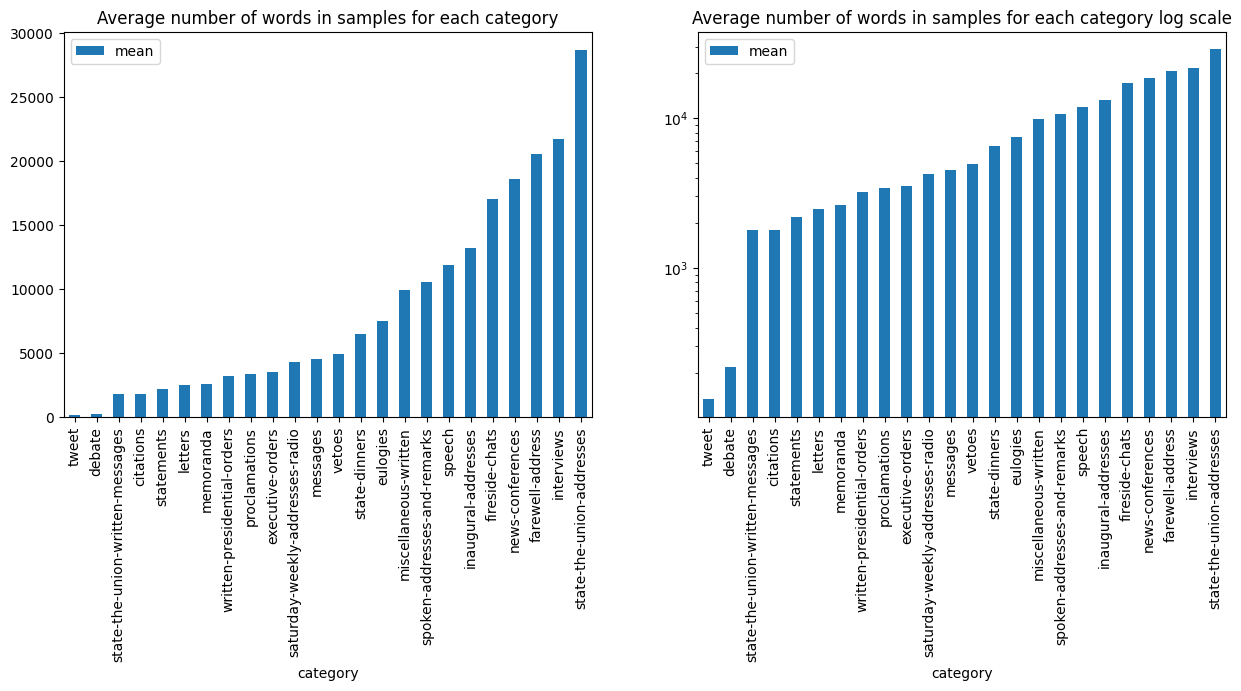

In [9]:
df2 = df.groupby(by=["category"]).agg(
            mean=pd.NamedAgg(column="nb_words", aggfunc="mean"),
            std=pd.NamedAgg(column="nb_words", aggfunc="std"),
        )
df2 = df2[["mean"]].sort_values(by="mean")

plot_double_bar(df2, title="Average number of words in samples for each category")

## Display the number of words for a minimized set of president

In [10]:
dfs = df.loc[
    df["name"].isin(["Donald Trump", "Barack Obama", "Joe Biden", "George W. Bush"])
]

### Number of words in total for each president

<Axes: xlabel='name'>

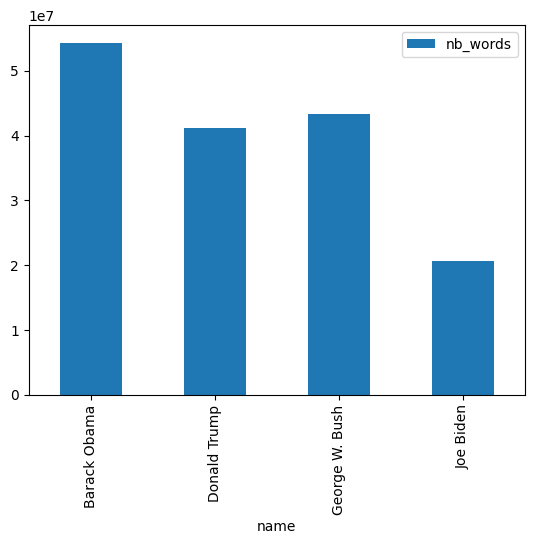

In [11]:
dfs.groupby(dfs["name"]).aggregate({"nb_words": "sum"}).plot(kind="bar")

### Number of samples for each category for each president

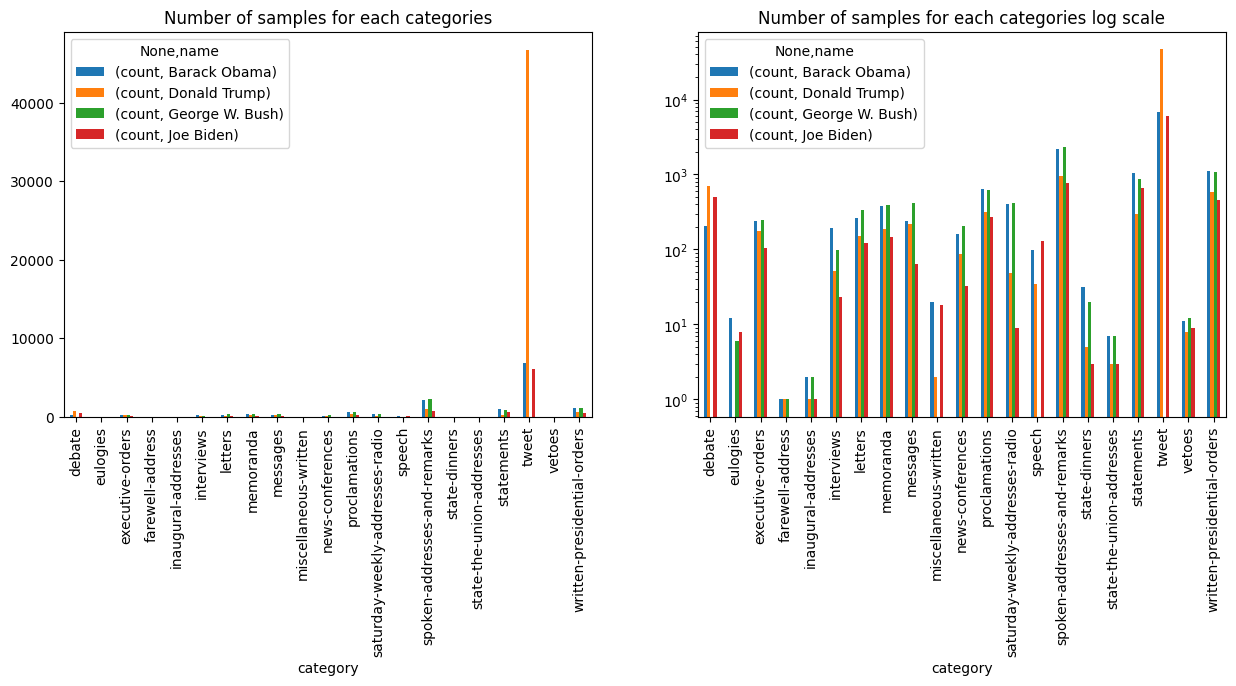

In [12]:
dfs2 = dfs.groupby(["name", "category"]).count().rename(columns={"date":"count"})[["count"]].unstack("name")
plot_double_bar(dfs2, title="Number of samples for each categories")

### Number of words for each category for each president

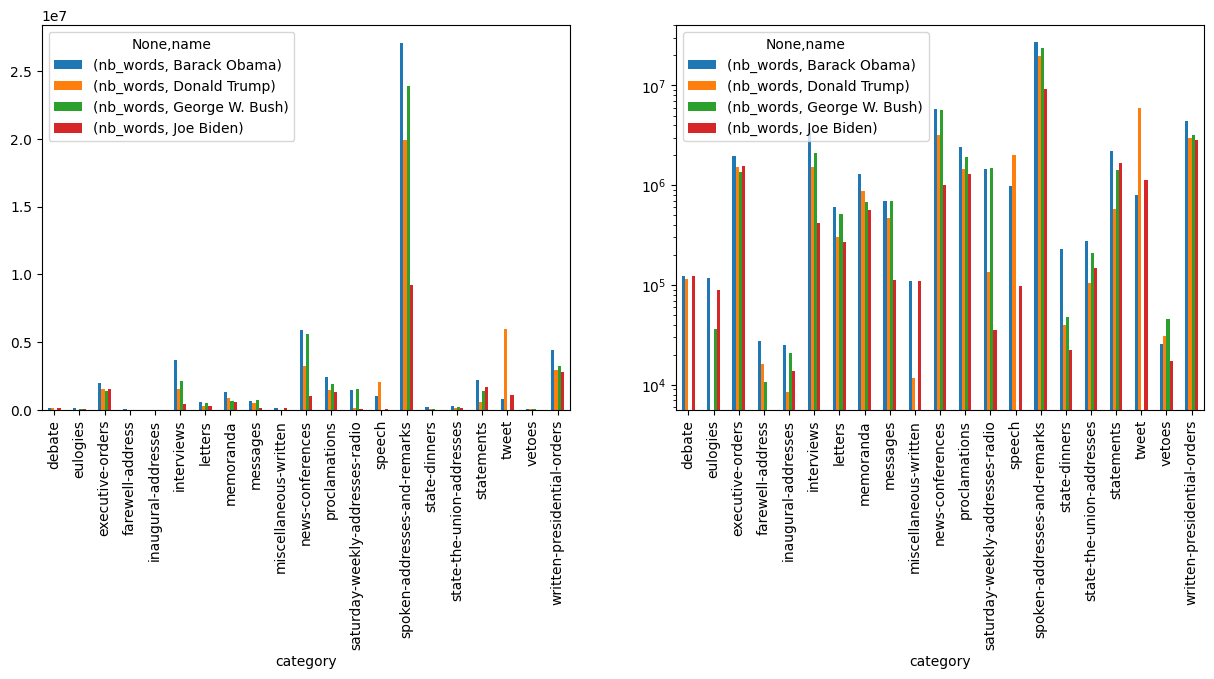

In [14]:
dfs2 = dfs.groupby(["name", "category"]).aggregate({"nb_words": "sum"}).unstack("name")
plot_double_bar(dfs2)

### The most present words (token)

In [11]:
dfs["words"] = dfs["text"].str.split(" ")
dfs

/tmp/ipykernel_5850/1167741868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs["words"] = dfs["text"].str.split(" ")


,category,name,date,text,nb_words,words
0,debate,Barack Obama,2012-10-03 09:00:00,"Well, thank you very much, Jim, for this oppor...",2038,"[Well,, thank, you, very, much,, Jim,, for, th..."
1,debate,Barack Obama,2012-10-03 09:00:00,"Well, let me talk specifically about what I th...",1417,"[Well,, let, me, talk, specifically, about, wh..."
2,debate,Barack Obama,2012-10-03 09:00:00,"So all of this is possible. Now, in order for ...",840,"[So, all, of, this, is, possible., Now,, in, o..."
3,debate,Barack Obama,2012-10-03 09:00:00,"Well, I think — let’s talk about taxes, becaus...",1220,"[Well,, I, think, —, let’s, talk, about, taxes..."
4,debate,Barack Obama,2012-10-03 09:00:00,When you add up all the loopholes and deductio...,252,"[When, you, add, up, all, the, loopholes, and,..."
...,...,...,...,...,...,...
1636,saturday-weekly-addresses-radio,Barack Obama,"November 14, 2015","\nHi, everybody. This week, America came toget...",2950,"[\nHi,, everybody., This, week,, America, came..."
1637,saturday-weekly-addresses-radio,George W. Bush,"December 15, 2007","\nGood morning. In a time of war, America's to...",2028,"[\nGood, morning., In, a, time, of, war,, Amer..."
7,farewell-address,George W. Bush,"January 15, 2009","\nThank you. Fellow citizens: For 8 years, it ...",10613,"[\nThank, you., Fellow, citizens:, For, 8, yea..."
9,farewell-address,Donald Trump,"January 19, 2021","\nMy fellow Americans, 4 years ago, we launche...",15993,"[\nMy, fellow, Americans,, 4, years, ago,, we,..."


In [12]:
dfs2 = dfs.explode(column="words")
dfs2

,category,name,date,text,nb_words,words
0,debate,Barack Obama,2012-10-03 09:00:00,"Well, thank you very much, Jim, for this oppor...",2038,"Well,"
0,debate,Barack Obama,2012-10-03 09:00:00,"Well, thank you very much, Jim, for this oppor...",2038,thank
0,debate,Barack Obama,2012-10-03 09:00:00,"Well, thank you very much, Jim, for this oppor...",2038,you
0,debate,Barack Obama,2012-10-03 09:00:00,"Well, thank you very much, Jim, for this oppor...",2038,very
0,debate,Barack Obama,2012-10-03 09:00:00,"Well, thank you very much, Jim, for this oppor...",2038,"much,"
...,...,...,...,...,...,...
10,farewell-address,Barack Obama,"January 10, 2017","\nThe President. Hello, Chicago! It's good to ...",27368,States
10,farewell-address,Barack Obama,"January 10, 2017","\nThe President. Hello, Chicago! It's good to ...",27368,of
10,farewell-address,Barack Obama,"January 10, 2017","\nThe President. Hello, Chicago! It's good to ...",27368,America.
10,farewell-address,Barack Obama,"January 10, 2017","\nThe President. Hello, Chicago! It's good to ...",27368,Thank


In [13]:
dfs2 = dfs2[dfs2["words"].str.len() > 4]
dfs2["words"] = dfs2["words"].str.replace(r"[^\w'-_&]", "", regex=True)
ws = [
    "the",
    "to",
    "of",
    "and",
    "a",
    "in",
    "that",
    "I",
    "is",
    "for",
    "have",
    "with",
    "they",
    "their",
    "what",
    "this",
    "are",
    "on",
    "it",
    "or",
    "not",
    "at",
    "by",
    "all",
    "about",
    "would",
    "going",
    "we're",
    "shall",
    "those",
    "think",
    "these",
    "because",
    "know",
    "through",
    "there",
    "these",
    "think",
    "thank",
    "which",
    "they're",
    "never",
    "realyy",
    "doing",
    "that's",
    "we've",
    "don't",
    "where",
]
# dfs2.drop(labels=ws, inplace=True, errors="ignore")
dfs2 = dfs2[~dfs2["words"].isin(ws)]
dfs2

/tmp/ipykernel_5850/2240737927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs2["words"] = dfs2["words"].str.replace(r"[^\w'-_&]", "", regex=True)


,category,name,date,text,nb_words,words
0,debate,Barack Obama,2012-10-03 09:00:00,"Well, thank you very much, Jim, for this oppor...",2038,"Well,"
0,debate,Barack Obama,2012-10-03 09:00:00,"Well, thank you very much, Jim, for this oppor...",2038,"much,"
0,debate,Barack Obama,2012-10-03 09:00:00,"Well, thank you very much, Jim, for this oppor...",2038,opportunity.
0,debate,Barack Obama,2012-10-03 09:00:00,"Well, thank you very much, Jim, for this oppor...",2038,Governor
0,debate,Barack Obama,2012-10-03 09:00:00,"Well, thank you very much, Jim, for this oppor...",2038,Romney
...,...,...,...,...,...,...
10,farewell-address,Barack Obama,"January 10, 2017","\nThe President. Hello, Chicago! It's good to ...",27368,United
10,farewell-address,Barack Obama,"January 10, 2017","\nThe President. Hello, Chicago! It's good to ...",27368,States
10,farewell-address,Barack Obama,"January 10, 2017","\nThe President. Hello, Chicago! It's good to ...",27368,America.
10,farewell-address,Barack Obama,"January 10, 2017","\nThe President. Hello, Chicago! It's good to ...",27368,Thank


In [14]:
dfs3 = dfs2.groupby(by=["name", "words"]).aggregate({"date": "count"})
dfs3

date
name         words        
Barack Obama '08?The     2
             '13just     1
             '14.And     1
             '15new      1
             '30s,       1
...                    ...
Joe Biden    Únete       1
             única       1
             únicas      1
             único       1
             보내세요        1

[721837 rows x 1 columns]

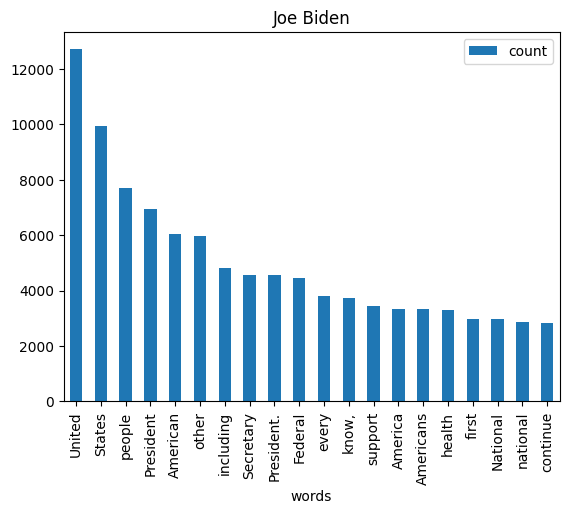

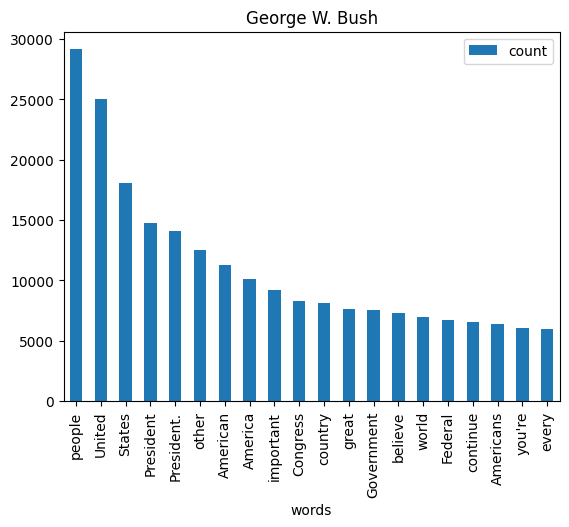

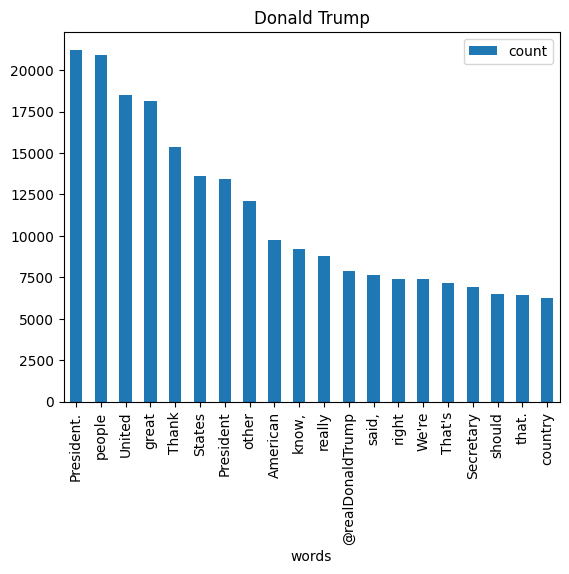

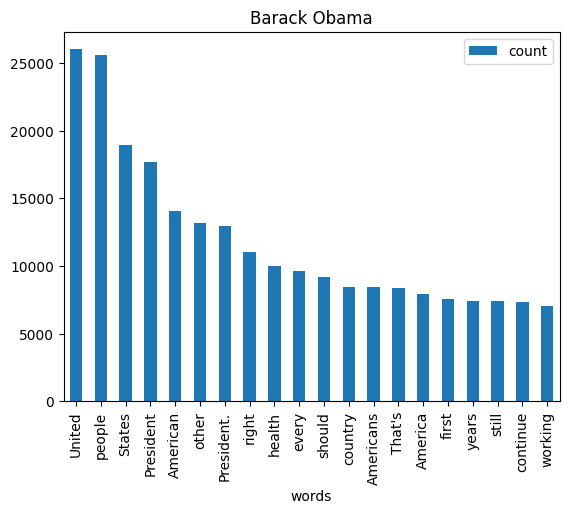

In [15]:
dfs4 = dfs3.copy()
dfs4.rename(columns={"date": "count"}, inplace=True)
dfs4.sort_values(by=["name", "count"], ascending=False, inplace=True)
dfs4.reset_index("words", inplace=True)
for name in dfs4.index.unique():
    dfs4[dfs4.index == name].reset_index()[["count", "words"]].set_index("words").head(
        n=20
    ).plot(kind="bar", title=name)